In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

In [2]:
HEADERS = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.0.2 Safari/605.1.15',
           'Accept': '*/*'
          }

Их нужно будет исправить

In [3]:
def get_html(url, params=None):
    r = requests.get(url, headers=HEADERS, params=params)
    #r.encoding = 'cp1251'
    r.encoding = 'utf-8'
    return r

In [4]:
def get_content(html):
    soup = BeautifulSoup(html, 'html.parser')
    
    items = soup.find_all('div', class_='ListingItem')
    
    cars = []

    for item in items:
        try:
            
            cars.append({'title' : item.find('a', class_='Link ListingItemTitle__link').get_text(),
                         'link' : item.find('a', class_='Link ListingItemTitle__link').get('href'),
                         'price' : re.sub('[^0-9]', '', item.find('div', class_='ListingItemPrice__content').get_text()),
                         'city' : item.find('span', class_='MetroListPlace__regionName MetroListPlace_nbsp').get_text(),
                         'year' : item.find('div', class_='ListingItem__year').get_text(),
                         'weel_type' : item.find_all('div', 
                                            class_='ListingItemTechSummaryDesktop__cell')[3].get_text(),
                         'car_type' : item.find_all('div', 
                                            class_='ListingItemTechSummaryDesktop__cell')[2].get_text(),
                         'transmission' : item.find_all('div', 
                                            class_='ListingItemTechSummaryDesktop__cell')[1].get_text(),
                         'color' : item.find_all('div', 
                                            class_='ListingItemTechSummaryDesktop__cell')[-1].get_text(),
                         'engine_volume' : item.find('div', class_='ListingItemTechSummaryDesktop__cell').get_text().split('/')[0],
                         'HP' : re.sub('[^0-9]', '', item.find('div', class_='ListingItemTechSummaryDesktop__cell').get_text().split('/')[1]),
                         'engine_type' : item.find('div', class_='ListingItemTechSummaryDesktop__cell').get_text().split('/')[2]
                        })
        except:
            continue
            
    return cars

In [5]:
def get_pages_count(html):
    soup = BeautifulSoup(html, 'html.parser')
    pages = soup.find_all('a', class_='Button Button_color_whiteHoverBlue Button_size_s Button_type_link Button_width_default ListingPagination__page')
    
    if pages:
        return int(pages[-1].get_text())
    else:
        return 1
    

In [6]:
def parse(brand='bmw'):
    URL = f'https://auto.ru/moskva/cars/{brand}/all/'
    html = get_html(URL)
    print(f'Парсим данные для {brand}')
    
    if html.status_code == 200:
        cars = []
        
        pages_count = get_pages_count(html.text)
        
        #print(pages_count)
        for page in range(1, pages_count+1):
            print(f'Парсим {page} страницу из {pages_count}')
            html = get_html(URL, params={'page' : page})
            cars.extend(get_content(html.text))
        
        return cars
            
        #print(html.text)
        
    else:
        print('Error')

In [7]:
brands = ['skoda', 'audi', 'honda', 'volvo', 
          'bmw', 'nissan', 'infinity', 'mercedes',
          'toyota', 'lexus', 'volkswagen', 'mitsubishi']

In [8]:
cars = pd.DataFrame()

In [9]:
for brand in brands:
    cars = cars.append(parse(brand))

Парсим данные для skoda
Парсим 1 страницу из 93
Парсим 2 страницу из 93
Парсим 3 страницу из 93
Парсим 4 страницу из 93
Парсим 5 страницу из 93
Парсим 6 страницу из 93
Парсим 7 страницу из 93
Парсим 8 страницу из 93
Парсим 9 страницу из 93
Парсим 10 страницу из 93
Парсим 11 страницу из 93
Парсим 12 страницу из 93
Парсим 13 страницу из 93
Парсим 14 страницу из 93
Парсим 15 страницу из 93
Парсим 16 страницу из 93
Парсим 17 страницу из 93
Парсим 18 страницу из 93
Парсим 19 страницу из 93
Парсим 20 страницу из 93
Парсим 21 страницу из 93
Парсим 22 страницу из 93
Парсим 23 страницу из 93
Парсим 24 страницу из 93
Парсим 25 страницу из 93
Парсим 26 страницу из 93
Парсим 27 страницу из 93
Парсим 28 страницу из 93
Парсим 29 страницу из 93
Парсим 30 страницу из 93
Парсим 31 страницу из 93
Парсим 32 страницу из 93
Парсим 33 страницу из 93
Парсим 34 страницу из 93
Парсим 35 страницу из 93
Парсим 36 страницу из 93
Парсим 37 страницу из 93
Парсим 38 страницу из 93
Парсим 39 страницу из 93
Парсим 40 

Парсим 52 страницу из 99
Парсим 53 страницу из 99
Парсим 54 страницу из 99
Парсим 55 страницу из 99
Парсим 56 страницу из 99
Парсим 57 страницу из 99
Парсим 58 страницу из 99
Парсим 59 страницу из 99
Парсим 60 страницу из 99
Парсим 61 страницу из 99
Парсим 62 страницу из 99
Парсим 63 страницу из 99
Парсим 64 страницу из 99
Парсим 65 страницу из 99
Парсим 66 страницу из 99
Парсим 67 страницу из 99
Парсим 68 страницу из 99
Парсим 69 страницу из 99
Парсим 70 страницу из 99
Парсим 71 страницу из 99
Парсим 72 страницу из 99
Парсим 73 страницу из 99
Парсим 74 страницу из 99
Парсим 75 страницу из 99
Парсим 76 страницу из 99
Парсим 77 страницу из 99
Парсим 78 страницу из 99
Парсим 79 страницу из 99
Парсим 80 страницу из 99
Парсим 81 страницу из 99
Парсим 82 страницу из 99
Парсим 83 страницу из 99
Парсим 84 страницу из 99
Парсим 85 страницу из 99
Парсим 86 страницу из 99
Парсим 87 страницу из 99
Парсим 88 страницу из 99
Парсим 89 страницу из 99
Парсим 90 страницу из 99
Парсим 91 страницу из 99


Парсим 80 страницу из 99
Парсим 81 страницу из 99
Парсим 82 страницу из 99
Парсим 83 страницу из 99
Парсим 84 страницу из 99
Парсим 85 страницу из 99
Парсим 86 страницу из 99
Парсим 87 страницу из 99
Парсим 88 страницу из 99
Парсим 89 страницу из 99
Парсим 90 страницу из 99
Парсим 91 страницу из 99
Парсим 92 страницу из 99
Парсим 93 страницу из 99
Парсим 94 страницу из 99
Парсим 95 страницу из 99
Парсим 96 страницу из 99
Парсим 97 страницу из 99
Парсим 98 страницу из 99
Парсим 99 страницу из 99
Парсим данные для lexus
Парсим 1 страницу из 36
Парсим 2 страницу из 36
Парсим 3 страницу из 36
Парсим 4 страницу из 36
Парсим 5 страницу из 36
Парсим 6 страницу из 36
Парсим 7 страницу из 36
Парсим 8 страницу из 36
Парсим 9 страницу из 36
Парсим 10 страницу из 36
Парсим 11 страницу из 36
Парсим 12 страницу из 36
Парсим 13 страницу из 36
Парсим 14 страницу из 36
Парсим 15 страницу из 36
Парсим 16 страницу из 36
Парсим 17 страницу из 36
Парсим 18 страницу из 36
Парсим 19 страницу из 36
Парсим 20 

In [10]:
cars['brand'] = cars['title'].apply(lambda x: x.split(' ')[0])
cars['price'] = cars['price'].astype(int)

In [11]:
cars = cars.reset_index(drop='index')

In [12]:
cars

,title,link,price,city,year,weel_type,car_type,transmission,color,engine_volume,HP,engine_type,brand
0,Skoda Octavia I (A4) Рестайлинг,https://auto.ru/cars/used/sale/skoda/octavia/1...,370000,Москва,2006,передний,лифтбек,механика,синий,1.8 л,150,Бензин,Skoda
1,Skoda Fabia I,https://auto.ru/cars/used/sale/skoda/fabia/110...,210000,Котельники,2002,передний,универсал 5 дв.,автомат,серебристый,1.4 л,75,Бензин,Skoda
2,Skoda Octavia IV (A8),https://auto.ru/cars/used/sale/skoda/octavia/1...,2770000,Реутов,2021,передний,лифтбек,робот,белый,1.5 л,130,Газ,Skoda
3,Skoda Fabia II Рестайлинг,https://auto.ru/cars/used/sale/skoda/fabia/110...,450000,Москва,2011,передний,хэтчбек 5 дв.,механика,синий,1.6 л,105,Бензин,Skoda
4,Skoda Octavia III (A7),https://auto.ru/cars/used/sale/skoda/octavia/1...,980000,Москва,2014,передний,лифтбек,робот,серебристый,1.8 л,180,Бензин,Skoda
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33238,Mitsubishi Outlander III Рестайлинг 3,https://auto.ru/cars/new/group/mitsubishi/outl...,2360000,Москва,2022,полный,внедорожник 5 дв.,вариатор,64 опции,2.0 л,146,Бензин,Mitsubishi
33239,Mitsubishi Outlander III Рестайлинг 3,https://auto.ru/cars/new/group/mitsubishi/outl...,2215000,Москва,2022,полный,внедорожник 5 дв.,вариатор,61 опция,2.0 л,146,Бензин,Mitsubishi
33240,Mitsubishi Outlander III Рестайлинг 3,https://auto.ru/cars/new/group/mitsubishi/outl...,2635000,Москва,2022,полный,внедорожник 5 дв.,вариатор,58 опций,2.4 л,167,Бензин,Mitsubishi
33241,Mitsubishi Outlander III Рестайлинг 3,https://auto.ru/cars/new/group/mitsubishi/outl...,2625000,Москва,2022,полный,внедорожник 5 дв.,вариатор,69 опций,2.4 л,167,Бензин,Mitsubishi


In [16]:
cars.to_csv('cars_used.csv')

<AxesSubplot:>

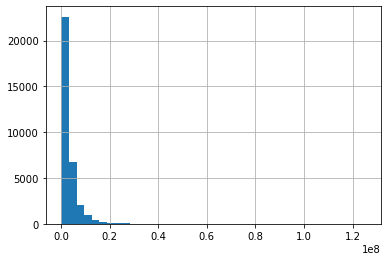

In [17]:
cars['price'].hist(bins=40)

In [15]:
cars['brand'].value_counts()

Mercedes-Benz    3732
Toyota           3728
BMW              3727
Volkswagen       3723
Nissan           3722
Audi             3634
Skoda            3465
Mitsubishi       3020
Volvo            2330
Lexus            1345
Honda             817
Name: brand, dtype: int64